In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\MasonLT_hab.rds')

In [3]:
df = result[None]
df['Habitat'].value_counts()
# 1) Water(E1UB/E2US/M2US)
# 2) E2EM
# 3) Nonwetland

3.0    56
1.0    55
2.0    41
Name: Habitat, dtype: int64

In [4]:
df['Wetland'] = np.where(df['Habitat']==3.0, 0, 1)
df['Wetland'].value_counts()

1    96
0    56
Name: Wetland, dtype: int64

<AxesSubplot:>

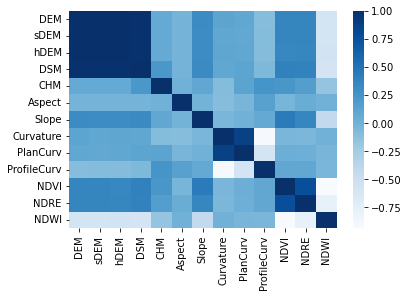

In [5]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [6]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
hDEM,-0.687217
sDEM,-0.687057
DEM,-0.679736
DSM,-0.679028
NDRE,-0.222911
NDVI,-0.147155
CHM,-0.097685
Slope,-0.047820
ProfileCurv,-0.024159
PlanCurv,-0.002448


In [8]:
df.to_csv("MasonLT.csv")